In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv('./top50.csv', sep=',', encoding='latin-1')

In [4]:
data.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [5]:
data.columns


Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [14]:
data.rename(columns={'Unnamed: 0':'Standing', 'Beats.Per.Minute':'Beats_Per_Minute',
                    'Loudness..dB..':'Loudness','Valence.':'Valence','Length.':'Length',
                    'Acousticness..':'Acousticness','Speechiness.':'Speechiness'}, inplace = True)

In [18]:
data.columns

Index(['Standing', 'Track.Name', 'Artist.Name', 'Genre', 'Beats_Per_Minute',
       'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length',
       'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [16]:
data['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [19]:
data['Artist.Name'].unique()

array(['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran',
       'Post Malone', 'Lil Tecca', 'Sam Smith', 'Lil Nas X',
       'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech',
       'Drake', 'Chris Brown', 'J Balvin', 'Y2K', 'Lizzo', 'MEDUZA',
       'Jhay Cortez', 'Lunay', 'Tones and I', 'Ali Gatie', 'Daddy Yankee',
       'The Chainsmokers', 'Maluma', 'Young Thug', 'Katy Perry',
       'Martin Garrix', 'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift',
       'Lady Gaga', 'Khalid', 'ROSALÍA', 'Marshmello', 'Nicky Jam'],
      dtype=object)

In [23]:
print(data['Popularity'].max())

95


In [24]:
print(data['Popularity'].min())


70


In [25]:
print(data['Popularity'].mean())


87.5


In [30]:
print(pd.isnull(data['Popularity']).count())


50


In [36]:
data.isnull().sum()

Standing            0
Track.Name          0
Artist.Name         0
Genre               0
Beats_Per_Minute    0
Energy              0
Danceability        0
Loudness            0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [37]:
data['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
electropop          2
canadian pop        2
reggaeton flow      2
brostep             2
dfw rap             2
panamanian pop      2
country rap         2
australian pop      1
escape room         1
r&b en espanol      1
pop house           1
boy band            1
big room            1
trap music          1
atl hip hop         1
Name: Genre, dtype: int64

In [38]:
data['Artist.Name'].value_counts()

Ed Sheeran          4
Ariana Grande       2
The Chainsmokers    2
Post Malone         2
Marshmello          2
Sech                2
Shawn Mendes        2
Billie Eilish       2
J Balvin            2
Lil Nas X           2
Young Thug          1
Jhay Cortez         1
Lauv                1
Drake               1
Anuel AA            1
Y2K                 1
Lil Tecca           1
Jonas Brothers      1
Katy Perry          1
Lady Gaga           1
Daddy Yankee        1
Lunay               1
Ali Gatie           1
Chris Brown         1
Sam Smith           1
Bad Bunny           1
MEDUZA              1
Khalid              1
Martin Garrix       1
Tones and I         1
Nicky Jam           1
Lewis Capaldi       1
Kygo                1
DJ Snake            1
Maluma              1
ROSALÍA             1
Taylor Swift        1
Lizzo               1
Name: Artist.Name, dtype: int64

In [39]:
data[['Beats_Per_Minute', 'Energy',
       'Danceability', 'Loudness', 'Liveness', 'Valence', 'Length', 'Acousticness', 'Speechiness',
       'Popularity']].describe()

,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


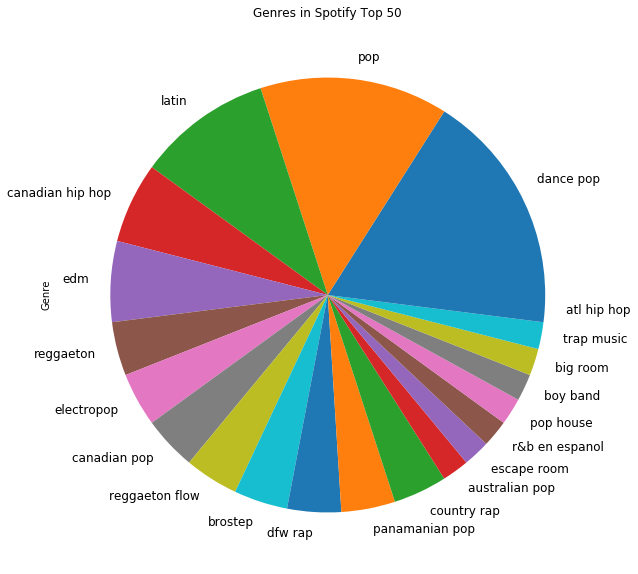

In [47]:
data['Genre'].value_counts(sort=True).plot.pie(figsize=(14,16), fontsize = 12)
plt.title('Genres in Spotify Top 50')
plt.show()

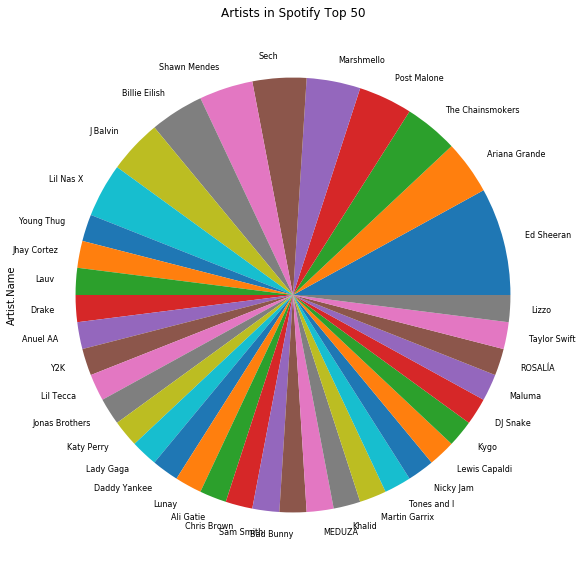

In [46]:
data['Artist.Name'].value_counts(sort=True).plot.pie(figsize=(14,10), fontsize = 8)
plt.title('Artists in Spotify Top 50')
plt.show()


In [48]:
correlation=data.corr(method='spearman')

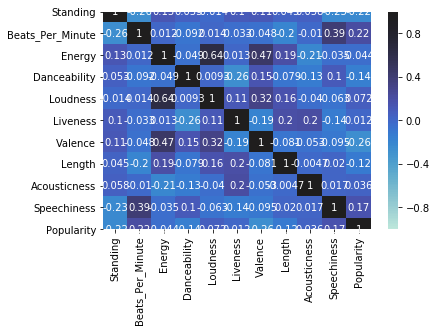

In [52]:
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,center=1)

In [54]:
data = data.drop(columns = ['Standing'], axis = 1) #'Standing' is an unnecessary column
data.head()

,Track.Name,Artist.Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [55]:
data.columns = data.columns.str.replace('.','_').str.lower()

In [56]:
data.head()

,track_name,artist_name,genre,beats_per_minute,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [57]:
genres = ['electropop', 'dfw rap', 'reggaeton', 'canadian hip hop', 'reggaeton flow', 'trap music', 'panamanian pop', 'country rap', 'pop house', 'escape room', 'latin', 'pop', 'dance pop', 'big room', 'atl hip hop', 'edm', 'r&b en espanol', 'brostep', 'australian pop', 'boy band', 'canadian pop']

In [58]:
def find_avgpop(df):

    #Finds the average popularity of each genre and appends it to an empty list
    avgpop_lst = []
    for each in genres:
        new_df = df[df['genre'] == each]
        avgpop = new_df['popularity'].mean()
        avgpop_lst.append(avgpop)
        if len(avgpop_lst) == 21:
            return avgpop_lst
        else:
            continue

In [60]:
avgpop_lst = find_avgpop(data)
avgpop_lst

[92.0,
 92.5,
 91.0,
 89.66666666666667,
 87.5,
 92.0,
 89.0,
 89.0,
 91.0,
 91.0,
 89.8,
 85.85714285714286,
 85.75,
 89.0,
 89.0,
 86.66666666666667,
 88.0,
 88.0,
 83.0,
 80.0,
 74.5]

In [63]:
avgpop = pd.Series(avgpop_lst, name = 'Average Popularity')
avgpop

0     92.000000
1     92.500000
2     91.000000
3     89.666667
4     87.500000
5     92.000000
6     89.000000
7     89.000000
8     91.000000
9     91.000000
10    89.800000
11    85.857143
12    85.750000
13    89.000000
14    89.000000
15    86.666667
16    88.000000
17    88.000000
18    83.000000
19    80.000000
20    74.500000
Name: Average Popularity, dtype: float64

In [65]:
genres = pd.Series(genres, name = 'Genres')
genres

0           electropop
1              dfw rap
2            reggaeton
3     canadian hip hop
4       reggaeton flow
5           trap music
6       panamanian pop
7          country rap
8            pop house
9          escape room
10               latin
11                 pop
12           dance pop
13            big room
14         atl hip hop
15                 edm
16      r&b en espanol
17             brostep
18      australian pop
19            boy band
20        canadian pop
Name: Genres, dtype: object

In [66]:
new_df = pd.concat([genres, avgpop], axis = 1)
new_df = new_df.sort_values('Average Popularity', ascending = False)
#new_df = new_df.reset_index(drop = True)
#new_df.index = new_df.index + 1
new_df


,Genres,Average Popularity
1,dfw rap,92.500000
0,electropop,92.000000
5,trap music,92.000000
8,pop house,91.000000
2,reggaeton,91.000000
9,escape room,91.000000
10,latin,89.800000
3,canadian hip hop,89.666667
7,country rap,89.000000
6,panamanian pop,89.000000
